## Phenology Modelling with springtime

In [ ]:
import os
import rpy2.robjects as ro



In [3]:
os.environ["R_HOME"] = r"C:/PROGRA~1/R/R-44~1.2"
os.environ["PATH"] += os.pathsep + r"C:/PROGRA~1/R/R-44~1.2/bin" # user R path 

In [4]:
print(ro.r('.libPaths()'))

[1] "C:/Users/medha/AppData/Local/R/win-library/4.4"
[2] "C:/Program Files/R/R-4.4.2/library"            



In [5]:
# Load the springtime dataset
from springtime.datasets.rnpn import npn_species

In [6]:
# Check environment path 
print(os.environ["PATH"])
print(os.environ.get("R_LIBS", ""))

c:\Users\medha\anaconda3\envs\springtime;C:\Users\medha\anaconda3\envs\springtime;C:\Users\medha\anaconda3\envs\springtime\Library\mingw-w64\bin;C:\Users\medha\anaconda3\envs\springtime\Library\usr\bin;C:\Users\medha\anaconda3\envs\springtime\Library\bin;C:\Users\medha\anaconda3\envs\springtime\Scripts;C:\Users\medha\anaconda3\envs\springtime\bin;C:\Users\medha\anaconda3\condabin;C:\Users\medha\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python\Python 3.13;c:\windows\system32;C:\Program Files\Git\cmd;C:\Users\medha\AppData\Local\Programs\Python\Python313\Scripts;C:\Users\medha\AppData\Local\Programs\Python\Python313;C:\Users\medha\AppData\Local\Programs\Python\Python313\python.exe;C:\Users\medha\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.13;C:\Users\medha\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python\Python 3.13;c:\windows\system32;C:\Program Files\Git\cmd;C:\Users\medha\OneDrive - University of Twente\Documents\Q2\Projects\ScientificGeocomp

#### Loading and exploring the USA NPN dataset within springtime

In [7]:
species = npn_species()
species

,species_id,common_name,genus,genus_id,genus_common_name,species,kingdom,itis_taxonomic_sn,functional_type,class_id,class_common_name,class_name,order_id,order_common_name,order_name,family_id,family_name,family_common_name
0,120,'ohi'a lehua,Metrosideros,798,Lehuas (Metrosideros),polymorpha,Plantae,27259.0,Evergreen broadleaf,15,Flowering Plants,Magnoliopsida,89,Myrtle and Evening-primrose Families,Myrtales,301,Myrtaceae,Myrtle Family
1,1436,absinthium,Artemisia,437,Sagebrushes (Artemisia),absinthium,Plantae,35445.0,Forb,15,Flowering Plants,Magnoliopsida,69,"Aster, Bellflower and Buckbean Families",Asterales,242,Asteraceae,Aster Family
2,1227,Acadian flycatcher,Empidonax,612,Empidonax Flycatchers (Empidonax),virescens,Animalia,178339.0,Bird,5,Birds,Aves,31,Perching Birds,Passeriformes,154,Tyrannidae,Tyrant Flycatchers
3,1229,acorn woodpecker,Melanerpes,790,Melanerpine Woodpeckers (Melanerpes),formicivorus,Animalia,178189.0,Bird,5,Birds,Aves,33,Woodpeckers,Piciformes,158,Picidae,Woodpeckers
4,2110,Adam and Eve,Aplectrum,1285,Adam and Eves (Aplectrum),hyemale,Plantae,43489.0,Forb,15,Flowering Plants,Magnoliopsida,68,"Asparagas, Iris, Orchid and Aloe Families",Asparagales,307,Orchidaceae,Orchid Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,1671,yerba mansa,Anemopsis,413,Yerba Mansa (Anemopsis),californica,Plantae,18223.0,Forb,15,Flowering Plants,Magnoliopsida,92,Birthwort and Lizard's-tail Families,Piperales,331,Saururaceae,Lizard's-tail Family
1845,228,Yoshino cherry,Prunus,933,Cherries (Prunus),yedoensis,Plantae,836663.0,Deciduous broadleaf,15,Flowering Plants,Magnoliopsida,96,"Oleaster, Buckthorn, Rose and Elm Families",Rosales,325,Rosaceae,Rose Family
1846,1043,youth on age,Tolmiea,1058,Youth on Ages (Tolmiea),menziesii,Plantae,24533.0,Forb,15,Flowering Plants,Magnoliopsida,98,"Currant, Witch-hazel and Saxifrage Families",Saxifragales,332,Saxifragaceae,Saxifrage Family
1847,1395,zebra-tailed lizard,Callisaurus,479,Zebra-tailed Lizards (Callisaurus),draconoides,Animalia,173906.0,Reptile,10,Reptiles,Reptilia,54,Snakes and Lizards,Squamata,209,Phrynosomatidae,Zebra-tailed and Horned Lizards


In [ ]:
#Testing the dataset with sample species, as in documentation
species.query('common_name.str.contains("lilac")')

,species_id,common_name,genus,genus_id,genus_common_name,species,kingdom,itis_taxonomic_sn,functional_type,class_id,class_common_name,class_name,order_id,order_common_name,order_name,family_id,family_name,family_common_name
436,36,common lilac,Syringa,1035,Lilacs (Syringa),vulgaris,Plantae,32996.0,Deciduous broadleaf,15,Flowering Plants,Magnoliopsida,83,"Mint, Olive and Plantain Families",Lamiales,305,Oleaceae,Olive Family
932,1243,lilac borer,Podosesia,912,Ash/Lilac Borer Moths (Podosesia),syringae,Animalia,NaN,Insect,8,Insects,Insecta,43,Butterflies and Moths,Lepidoptera,363,Sesiidae,Clearwing Moths
933,1169,lilac chastetree,Vitex,1096,Chastetrees (Vitex),agnus-castus,Plantae,32221.0,Deciduous broadleaf,15,Flowering Plants,Magnoliopsida,83,"Mint, Olive and Plantain Families",Lamiales,286,Lamiaceae,Mint Family
975,1214,Manchurian lilac,Syringa,1035,Lilacs (Syringa),pubescens,Plantae,832925.0,Deciduous broadleaf,15,Flowering Plants,Magnoliopsida,83,"Mint, Olive and Plantain Families",Lamiales,305,Oleaceae,Olive Family
1281,35,Red Rothomagensis lilac,Syringa,1035,Lilacs (Syringa),chinensis,Plantae,832915.0,Deciduous broadleaf,15,Flowering Plants,Magnoliopsida,83,"Mint, Olive and Plantain Families",Lamiales,305,Oleaceae,Olive Family


In [10]:
from springtime.datasets.rnpn import npn_species_ids_by_functional_type

cactus = npn_species_ids_by_functional_type("Cactus")
print(cactus)

name='Cactus' items=[946, 945, 2011, 2133, 867, 1941, 294, 855, 1746, 1958, 1773, 2012, 215, 210, 948, 866, 947, 1942]


In [11]:
species.functional_type.value_counts()

functional_type
Forb                           591
Deciduous broadleaf            361
Bird                           168
Evergreen broadleaf            145
Graminoid                      139
Insect                          96
Drought deciduous broadleaf     71
Amphibian                       41
Mammal                          39
Semi-evergreen broadleaf        35
Evergreen conifer               28
Semi-evergreen forb             28
Reptile                         25
Fish                            22
Pine                            20
Cactus                          18
Evergreen forb                  16
Deciduous conifer                5
Algae                            1
Name: count, dtype: int64

#### USA NPN data for Acer Rubrum (red maple)

In [12]:
from springtime.datasets import RNPN

# Create a data instance
dataset = RNPN(
    species_ids={"name": "SAcer Rubrum", "items": [3]}, 
    phenophase_ids={"name": "leaves", "items": [483]},
    years=[2011, 2021],
)
print(dataset)

dataset='RNPN' years=YearRange(start=2011, end=2021) species_ids=NamedIdentifiers(name='SAcer Rubrum', items=[3]) phenophase_ids=NamedIdentifiers(name='leaves', items=[483]) area=None use_first=True aggregation_operator='median'


In [13]:
df = dataset.raw_load()
df.head()

,site_id,latitude,longitude,elevation_in_meters,state,species_id,genus,species,common_name,kingdom,...,first_yes_day,first_yes_doy,first_yes_julian_date,numdays_since_prior_no,last_yes_year,last_yes_month,last_yes_day,last_yes_doy,last_yes_julian_date,numdays_until_next_no
0,2,43.085350,-70.691330,12,ME,3,Acer,rubrum,red maple,Plantae,...,12,132,2455694,15,2011,10,26,299,2455861,18
1,459,36.524502,-92.751999,234,MO,3,Acer,rubrum,red maple,Plantae,...,15,105,2455667,23,2011,4,21,111,2455673,179
2,1068,38.776115,-75.152031,4,DE,3,Acer,rubrum,red maple,Plantae,...,15,288,2455850,212,2011,11,15,319,2455881,-9999
3,459,36.524502,-92.751999,234,MO,3,Acer,rubrum,red maple,Plantae,...,15,105,2455667,23,2011,4,21,111,2455673,179
4,443,42.304653,-83.701180,276,MI,3,Acer,rubrum,red maple,Plantae,...,8,128,2455690,2,2011,11,7,311,2455873,2


#### Load and save the recipe

In [15]:
print(dataset.to_recipe())
data = dataset.to_recipe()
import yaml
# dataset.to_recipe("Recipe.yml")
with open("recip.yaml", 'w') as file:
    yaml.dump(data, file, default_flow_style=False)
    

dataset: RNPN
years:
- 2011
- 2021
species_ids:
  name: SAcer Rubrum
  items:
  - 3
phenophase_ids:
  name: leaves
  items:
  - 483
use_first: true
aggregation_operator: median



#### Accessing Daymet data for the chosen states (IL, NY, MN)

In [16]:
from springtime.datasets import Daymet

daymet_points = Daymet(
    variables=["tmin", "tmax"],
    points=[
        [-88, 41.8], # Coordinates for Minnesota, Illinois and New York
        [-92.7, 48],
        [-73.87, 40.8],
    ],
    years=[2011, 2021],
)

temp_df = daymet_points.raw_load()
print(temp_df.head())
temp_df.to_csv('temperature.csv')

   year  yday  dayl (s)  prcp (mm/day)  srad (W/m^2)  swe (kg/m^2)  \
0  2011     1  32490.72            0.0        198.92           0.0   
1  2011     2  32535.07            0.0        182.64           0.0   
2  2011     3  32583.05            0.0        217.23           0.0   
3  2011     4  32634.61            0.0        165.80           0.0   
4  2011     5  32689.72            0.0        235.11           0.0   

   tmax (deg c)  tmin (deg c)  vp (Pa)          geometry  
0          1.73         -7.07   359.41  POINT (-88 41.8)  
1         -3.66        -11.12   261.61  POINT (-88 41.8)  
2          2.20         -8.18   329.85  POINT (-88 41.8)  
3         -2.23         -8.68   317.28  POINT (-88 41.8)  
4         -0.37        -12.74   229.51  POINT (-88 41.8)  


#### Merging the USA NPN and Daymet data

In [ ]:
import pandas as pd
from springtime.utils import join_dataframes
new_df = pd.merge(df, temp_df, left_on='first_yes_doy', right_on='yday', how='inner')
new_df.head()

,site_id,latitude,longitude,elevation_in_meters,state,species_id,genus,species,common_name,kingdom,...,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),geometry
0,2,43.08535,-70.69133,12,ME,3,Acer,rubrum,red maple,Plantae,...,2011,132,51325.21,0.00,471.64,0.0,30.59,16.54,1880.60,POINT (-88 41.8)
1,2,43.08535,-70.69133,12,ME,3,Acer,rubrum,red maple,Plantae,...,2012,132,51325.21,3.34,408.72,0.0,24.96,6.57,972.05,POINT (-88 41.8)
2,2,43.08535,-70.69133,12,ME,3,Acer,rubrum,red maple,Plantae,...,2013,132,51325.21,0.00,429.96,0.0,12.80,2.32,721.91,POINT (-88 41.8)
3,2,43.08535,-70.69133,12,ME,3,Acer,rubrum,red maple,Plantae,...,2014,132,51325.21,10.14,324.29,0.0,29.49,16.50,1875.72,POINT (-88 41.8)
4,2,43.08535,-70.69133,12,ME,3,Acer,rubrum,red maple,Plantae,...,2015,132,51325.21,0.00,306.43,0.0,14.88,7.65,1046.70,POINT (-88 41.8)


#### Filtering data
On merging the two datasets we observed that the all the states with Acer rubrum were in the final DF, therefore we again filter the required states

In [ ]:
filtered_df = new_df.query("state=='NY' or state=='IL' or state=='MN'").reset_index()
print(filtered_df.head())
# filtered_df.to_csv('OutputFile.csv') # optional

   index  site_id   latitude  longitude  elevation_in_meters state  \
0    198     1419  42.011166 -88.503304                  280    IL   
1    199     1419  42.011166 -88.503304                  280    IL   
2    200     1419  42.011166 -88.503304                  280    IL   
3    201     1419  42.011166 -88.503304                  280    IL   
4    202     1419  42.011166 -88.503304                  280    IL   

   species_id genus species common_name  ...  year  yday  dayl (s)  \
0           3  Acer  rubrum   red maple  ...  2011   127   50660.7   
1           3  Acer  rubrum   red maple  ...  2012   127   50660.7   
2           3  Acer  rubrum   red maple  ...  2013   127   50660.7   
3           3  Acer  rubrum   red maple  ...  2014   127   50660.7   
4           3  Acer  rubrum   red maple  ...  2015   127   50660.7   

  prcp (mm/day)  srad (W/m^2)  swe (kg/m^2)  tmax (deg c)  tmin (deg c)  \
0          0.00        428.06           0.0         16.70          7.11   
1       

### Machine learning models
1) Attempt 1 - Using the target variable as is -> Hypothesis: The MAE and RMSE seem to be too large, the cause for this might be the range of the target variable being too large forcing the model to make large predictions
2) Attempt 2 - The target variable is normalized

In [20]:
from pycaret.regression import RegressionExperiment

# Create the target variable
filtered_df_new = filtered_df[['yday', 'last_yes_doy', 'prcp (mm/day)', 'tmax (deg c)', 'tmin (deg c)', 'srad (W/m^2)']].copy()
filtered_df_new['target'] = filtered_df_new['last_yes_doy'] - filtered_df_new['yday']
filtered_df_new['Tmean'] = (filtered_df_new['tmax (deg c)'] + filtered_df_new['tmin (deg c)'])/2

# REMOVING last_yes_doy and yday
final_df = filtered_df_new[['target', 'prcp (mm/day)', 'Tmean', 'srad (W/m^2)']].copy()
# final_df = final_df[final_df['target'] != 0]

# Initialize the PyCaret RegressionExperiment
exp = RegressionExperiment()
exp.setup(data=final_df, target="target")

# Compare models
exp.compare_models(["lr", "rf", "dummy"], n_select=3)

,Description,Value
0,Session id,5346
1,Target,target
2,Target type,Regression
3,Original data shape,"(42108, 4)"
4,Transformed data shape,"(42108, 4)"
5,Transformed train set shape,"(29475, 4)"
6,Transformed test set shape,"(12633, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,51.2883,4287.9454,65.4786,0.2516,2.0075,3.5718,1.3040
lr,Linear Regression,65.3792,5322.3113,72.9520,0.0711,2.3599,4.3807,0.9700
dummy,Dummy Regressor,70.0016,5731.6488,75.7063,-0.0004,2.4235,4.7365,0.0160


c:\Users\medha\anaconda3\envs\springtime\lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


[RandomForestRegressor(n_jobs=-1, random_state=5346),
 LinearRegression(n_jobs=-1),
 DummyRegressor()]

target           1.000000
srad (W/m^2)     0.247483
Tmean            0.020919
prcp (mm/day)    0.016227
Name: target, dtype: float64


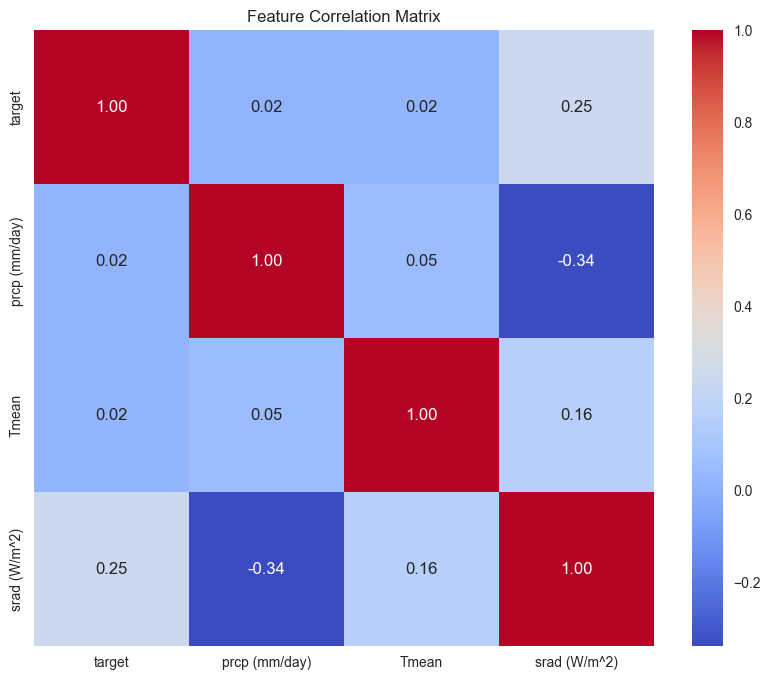

In [21]:
# Calculate correlation matrix
correlation_matrix = final_df.corr()

# Display correlation of all features with the target variable
print(correlation_matrix['target'].sort_values(ascending=False))

# Optionally, visualize the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [22]:
print(final_df['target'].describe())

count    42108.000000
mean        76.692790
std         75.614084
min          0.000000
25%          1.000000
50%         50.000000
75%        155.250000
max        245.000000
Name: target, dtype: float64


#### Scaling the target variable with MinMaxScaler

In [23]:
# Normalizing the model to observe changes 
from sklearn.preprocessing import MinMaxScaler
filtered_df_new['target'] = MinMaxScaler().fit_transform(filtered_df_new[['target']])

In [24]:
final_df = filtered_df_new[['target', 'prcp (mm/day)', 'Tmean', 'srad (W/m^2)']].copy()
final_df = final_df[final_df['target'] != 0]
# filtered_df_new.to_csv('target_var.csv')
# Initialize the PyCaret RegressionExperiment
exp = RegressionExperiment()
exp.setup(data=final_df, target="target")

# Compare models
exp.compare_models(["lr", "rf", "dummy"], n_select=3)

,Description,Value
0,Session id,3540
1,Target,target
2,Target type,Regression
3,Original data shape,"(32109, 4)"
4,Transformed data shape,"(32109, 4)"
5,Transformed train set shape,"(22476, 4)"
6,Transformed test set shape,"(9633, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1908,0.0616,0.2482,0.2742,0.1816,4.0695,0.6080
lr,Linear Regression,0.2499,0.0786,0.2803,0.0743,0.2061,5.7452,0.0180
dummy,Dummy Regressor,0.2681,0.0849,0.2913,-0.0003,0.2142,6.1504,0.0120


c:\Users\medha\anaconda3\envs\springtime\lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


[RandomForestRegressor(n_jobs=-1, random_state=3540),
 LinearRegression(n_jobs=-1),
 DummyRegressor()]

In [25]:
# target variable range
print(final_df['target'].describe())

count    32109.000000
mean         0.410512
std          0.291370
min          0.004082
25%          0.102041
50%          0.457143
75%          0.681633
max          1.000000
Name: target, dtype: float64


#### Plotting a correlation heatmap to ensure that the variables do not influence each other

target           1.000000
srad (W/m^2)     0.236063
prcp (mm/day)    0.008439
Tmean           -0.061246
Name: target, dtype: float64


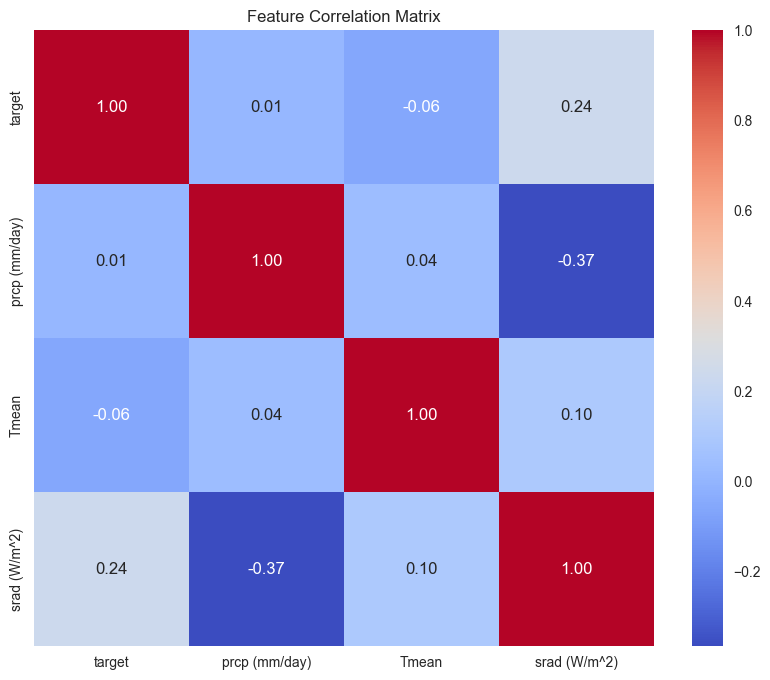

In [26]:
# Calculate correlation matrix
correlation_matrix = final_df.corr()

# Display correlation of all features with the target variable
print(correlation_matrix['target'].sort_values(ascending=False))

# Optionally, visualize the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()